# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [72]:
#Your code here
#Made lowercase.
df.columns = [col.lower() for col in df.columns]
#column_name_changes_dictionary = dict(zip(df.columns, df.columns.str.lower().str.strip()))
#df = df.rename(columns=column_name_changes_dictionary)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [73]:
#Your code here
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Painstakingly change the index back

In [74]:
# Your code here

#Make a new column linename and store the index values in it.
#df['linename'] = df.index.values

#Make a new column that will store the original indexes (0,1,2,...)
#df[''] = range(0, len(df))

#Update the index for the dataframe with the appropriate column
#df = df.set_index('')

#apparently you can just reset the index - this is much easier.
df = df.reset_index()

#preview the result
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [75]:
# Your code here

#get number of unique line names when grouped by station
station_line_counts = df.groupby('station')['linename'].nunique()

#convert pandas array to pandas dataframe type
station_line_counts_df = station_line_counts.to_frame()

#rename column in station_line_counts_df dataframe to Num_lines so that it is ready for the merge.
station_line_counts_df = station_line_counts_df.rename(columns={'linename' : 'Num_lines'})

#sort station line counts dataframe
station_line_counts_df = station_line_counts_df.sort_values('Num_lines', ascending=False)
print(station_line_counts_df)

#merge the two dataframes using the 'station' index.
df = df.merge(station_line_counts_df, on='station')

#Preview the new dataframe
df.head()


                 Num_lines
station                   
86 ST                    4
23 ST                    4
125 ST                   4
103 ST                   3
50 ST                    3
34 ST-PENN STA           3
18 AV                    3
FT HAMILTON PKY          3
FULTON ST                3
CHAMBERS ST              3
BAY PKWY                 3
AVENUE U                 3
14 ST                    3
CHURCH AV                3
KINGS HWY                3
59 ST                    3
116 ST                   3
111 ST                   3
96 ST                    3
7 AV                     3
TIMES SQ-42 ST           3
CANAL ST                 3
36 ST                    2
HALSEY ST                2
SPRING ST                2
28 ST                    2
GUN HILL RD              2
CLINTON-WASH AV          2
42 ST-PORT AUTH          2
BEDFORD PK BLVD          2
...                    ...
AVENUE I                 1
AVENUE H                 1
ATLANTIC AV              1
ASTORIA DITMARS          1
A

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,3
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,3
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,3
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,3
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,3


In [76]:
#sort the dataframe on the Num_lines column
df = df.sort_values('Num_lines', ascending=False)
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_lines
77006,23,R305,R206,01-00-00,125 ST,IRT,08/25/2018,01:00:00,REGULAR,134829301,67507647,4
75799,ACBD,N026,R102,00-00-05,125 ST,IND,08/30/2018,12:00:00,REGULAR,11868480,12354814,4
75792,ACBD,N026,R102,00-00-05,125 ST,IND,08/29/2018,12:00:00,REGULAR,11866537,12352141,4
75793,ACBD,N026,R102,00-00-05,125 ST,IND,08/29/2018,16:00:00,REGULAR,11867049,12352633,4
75794,ACBD,N026,R102,00-00-05,125 ST,IND,08/29/2018,20:00:00,REGULAR,11867663,12353567,4


## Write a function to clean a column name

In [77]:
def clean(col_name):
    cleaned = col_name.strip() #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [78]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [79]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [80]:
#Your code here

#Checking the datatype of the date column
print(df.date.dtype)

#Converting the date data to a datetime type
df.date = pd.to_datetime(df.date)

#Checking the datatype of the date column. It has changed to datetime[64]
print(df.date.dtype)

#df.date.dt.day_name().head()
#plt.bar(df.date.dt.day_name(), df.entries)

object
datetime64[ns]


In [84]:
#creates a new column called day_of_week which will contain the day of the week extracted from the date column.
df['day_of_week'] = df.date.dt.dayofweek

#preview the dataframe
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_lines,day_of_week
77006,23,R305,R206,01-00-00,125 ST,IRT,2018-08-25,01:00:00,REGULAR,134829301,67507647,4,5
75799,ACBD,N026,R102,00-00-05,125 ST,IND,2018-08-30,12:00:00,REGULAR,11868480,12354814,4,3
75792,ACBD,N026,R102,00-00-05,125 ST,IND,2018-08-29,12:00:00,REGULAR,11866537,12352141,4,2
75793,ACBD,N026,R102,00-00-05,125 ST,IND,2018-08-29,16:00:00,REGULAR,11867049,12352633,4,2
75794,ACBD,N026,R102,00-00-05,125 ST,IND,2018-08-29,20:00:00,REGULAR,11867663,12353567,4,2


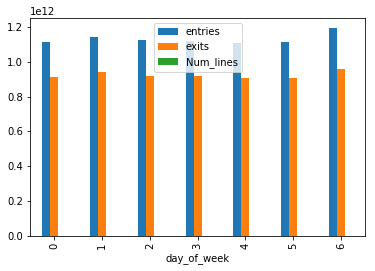

In [85]:
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='bar')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [ ]:
#Your code here

## Drop a couple of columns

In [ ]:
# Your code here

## Summary

Great! You practiced your data cleanup-skills using Pandas.